In [1]:
#importing req. Lib.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#load our data set
data = pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
#checking null values in our data
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# Preprocessing the Data

In [4]:
#tweet_created column got the date recorts and showing type is object we have to change it of date time format
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)


In [6]:
#checking uniques values in tweet_created columns
data['tweet_created'].nunique()

9

In [7]:
numberoftweets = data.groupby('tweet_created').size()
numberoftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

## Dealing with Null Values

In [8]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

#### airline_sentiment_gold, negativereason_gold have more than 99% missing data And tweet_coord have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [9]:
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']

In [10]:
freq = data.groupby('negativereason').size()
freq

negativereason
Bad Flight                      580
Can't Tell                     1190
Cancelled Flight                847
Customer Service Issue         2910
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         529
Late Flight                    1665
Lost Luggage                    724
longlines                       178
dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Count of Type of Sentiment')

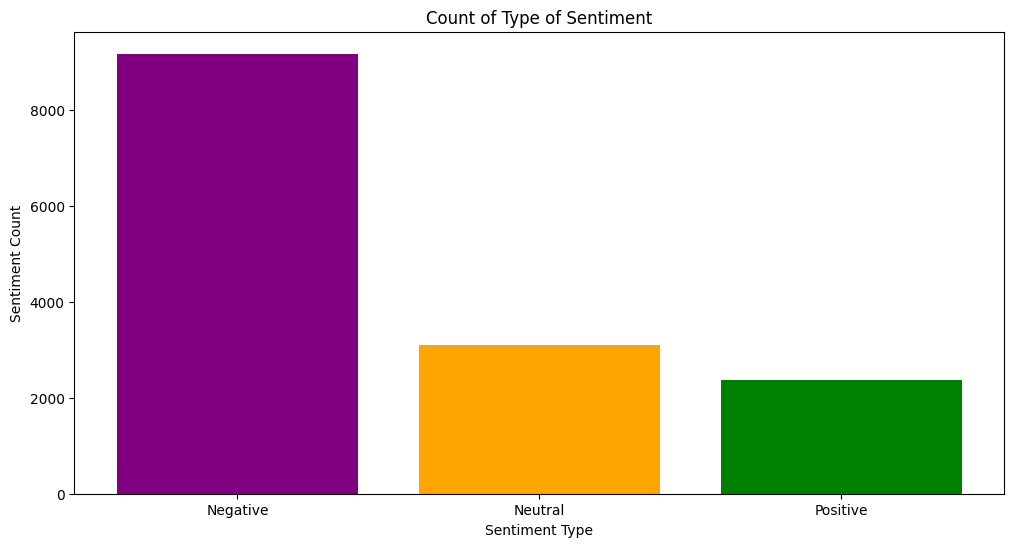

In [11]:
counter = data.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['purple','orange','green'])
plt.xticks(index,['Negative','Neutral','Positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

#### Sentiment by Airlines

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


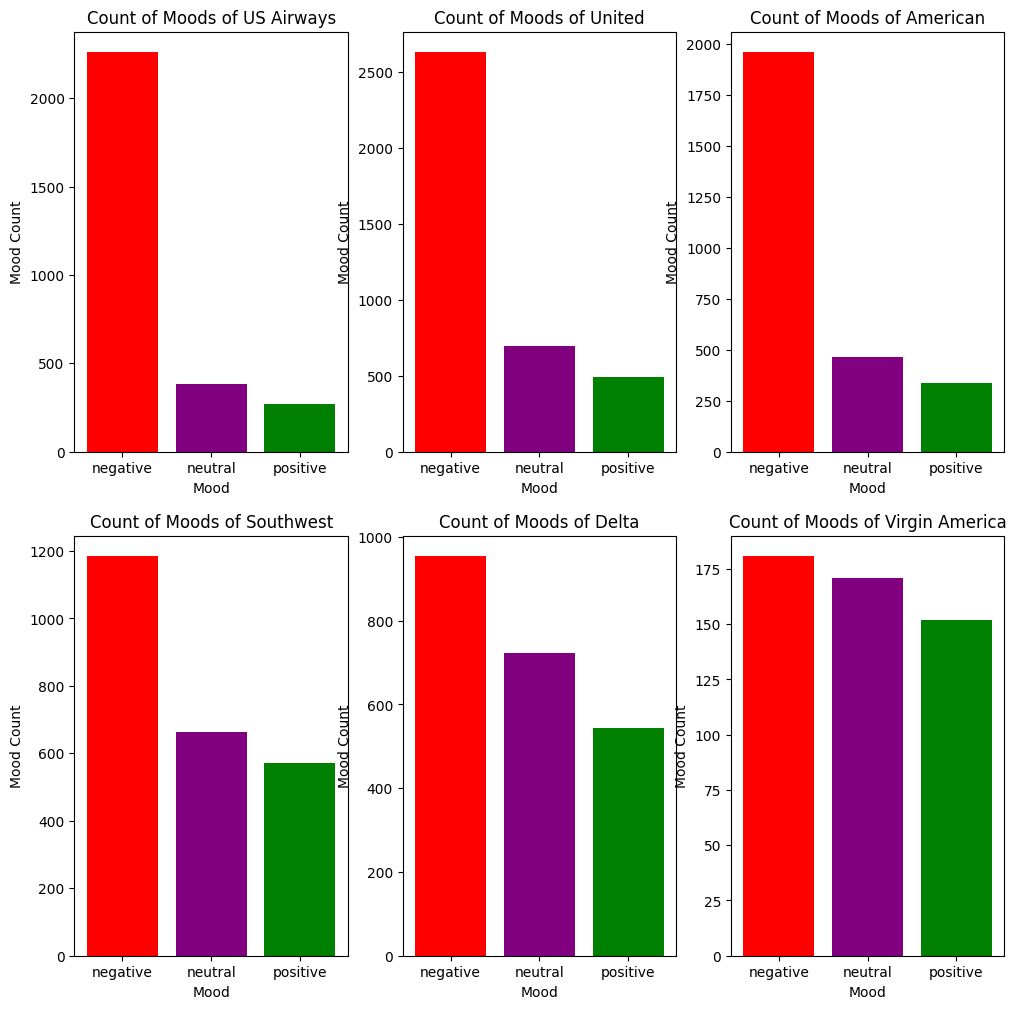

In [12]:
print("Total number of tweets for each airline \n ",data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=data[data['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'purple', 'green'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

In [17]:
#!pip install -U kaleido
import pandas as pd
import plotly.express as px
import os

# Load your dataset
data = pd.read_csv('Tweets.csv')

# Converting 'tweet_created' to datetime
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

# List of airlines
airlines = ['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']

# Creating a separate folder to save the plots
folder_path = 'airline_sentiment_plots'
os.makedirs(folder_path, exist_ok=True)

# Generating and saving plots
for airline in airlines:
    new_df = data[data['airline'] == airline]
    count = new_df['airline_sentiment'].value_counts()
    fig = px.bar(count, color=count.index, title=f'Count of Moods of {airline}', 
                 labels={'index': 'Mood', 'value': 'Count'}, 
                 color_discrete_sequence=px.colors.qualitative.D3)
    fig.update_xaxes(title_text='Mood')
    fig.update_yaxes(title_text='Mood Count')

    # Saving the figure
    file_name = f'{airline}_sentiment_plot.png'
    file_path = os.path.join(folder_path, file_name)
    fig.write_image(file_path)


In [18]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame loaded from 'Tweets.csv'
neg_tweets = data.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = data.groupby(['airline'])['airline_sentiment'].count()

my_dict = {
    'American': neg_tweets[0] / total_tweets[0],
    'Delta': neg_tweets[3] / total_tweets[1],
    'Southwest': neg_tweets[6] / total_tweets[2],
    'US Airways': neg_tweets[9] / total_tweets[3],
    'United': neg_tweets[12] / total_tweets[4],
    'Virgin America': neg_tweets[15] / total_tweets[5]
}
perc = pd.DataFrame.from_dict(my_dict, orient='index')
perc.columns = ['Percent Negative']

# Creating the Plotly bar plot using the D3 color palette
fig = px.bar(perc, y='Percent Negative', color=perc.index,
             labels={'index': 'Airline', 'Percent Negative': 'Percentage of Negative Tweets'},
             color_discrete_sequence=px.colors.qualitative.D3,
             title='Percentage of Negative Tweets for Each Airline')

# Save the plot as an image
save_path = 'airline_negative_tweets_percentage.png'
fig.write_image(save_path)


#### Percentage of the negative reviews for each airline.

            Percent Negative
American            0.710402
Delta               0.429793
Southwest           0.490083
US Airways          0.776862
United              0.688906
Virgin              0.359127


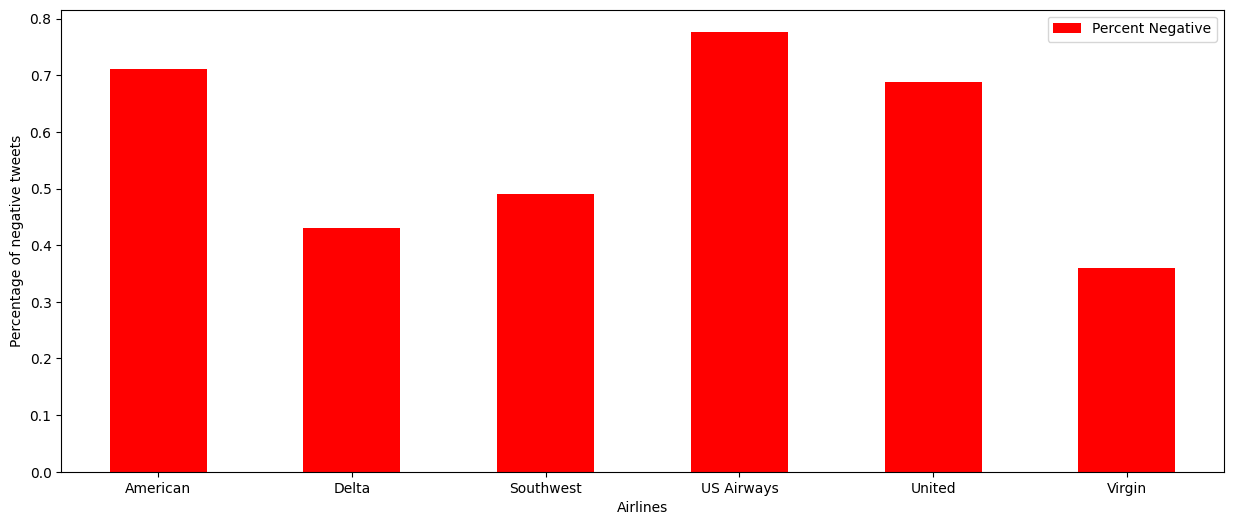

In [17]:
neg_tweets = data.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = data.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)

# List of colors for each airline
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

# Plotting with unique colors for each airline
ax = perc.plot(kind='bar', rot=0, color=colors, figsize=(15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

<Axes: xlabel='airline'>

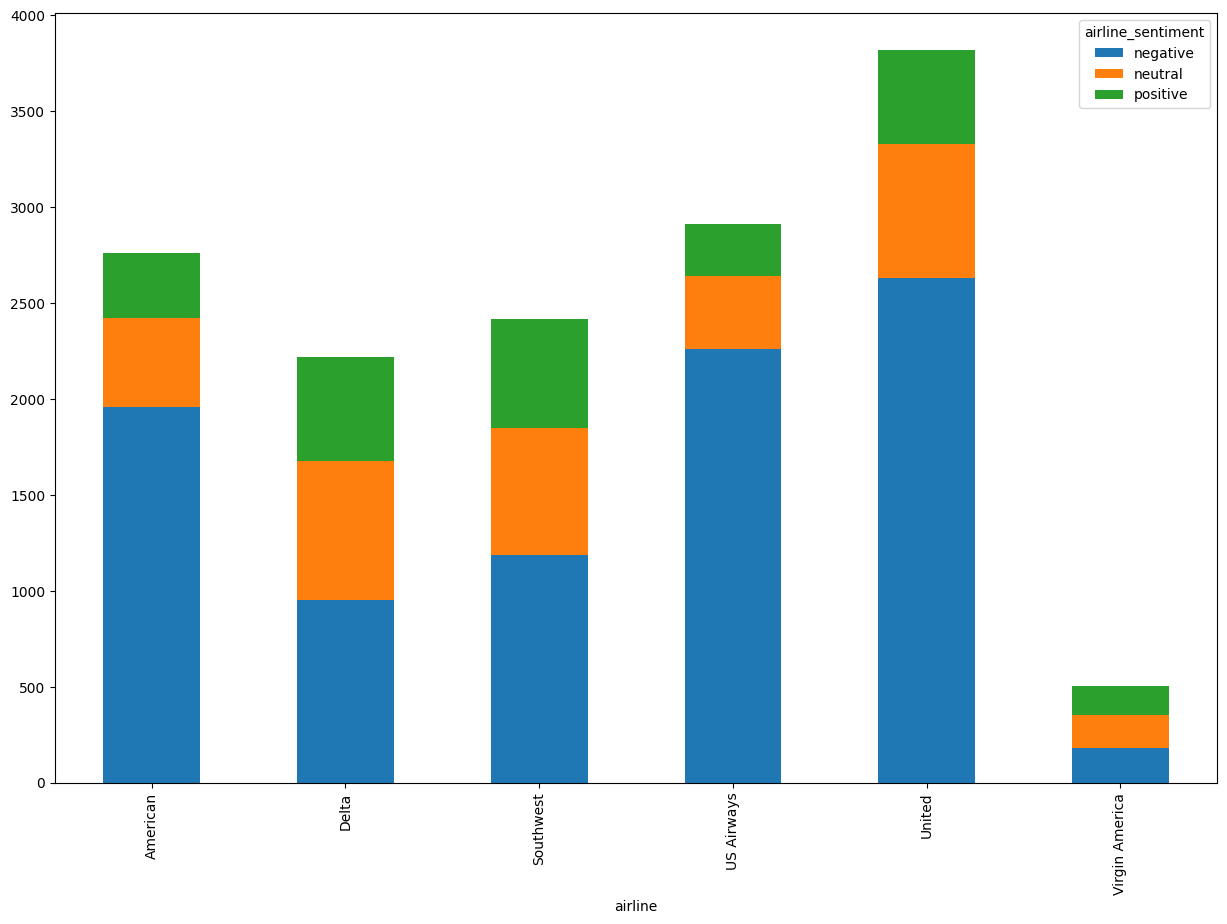

In [18]:
figure_2 = data.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [19]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame loaded from 'Tweets.csv'
figure_2 = data.groupby(['airline', 'airline_sentiment']).size()
figure_2_df = figure_2.unstack()

# Creating a stacked bar plot with Plotly
fig = px.bar(figure_2_df, barmode='stack', 
             labels={'value': 'Count', 'airline_sentiment': 'Sentiment'},
             color_discrete_sequence=px.colors.qualitative.D3,
             title='Stacked Sentiment Counts for Each Airline')

# Save the plot as an image
save_path_stacked = 'airline_sentiment_stacked.png'
fig.write_image(save_path_stacked)


#### Top 10 Reasons behing Negative Emotion

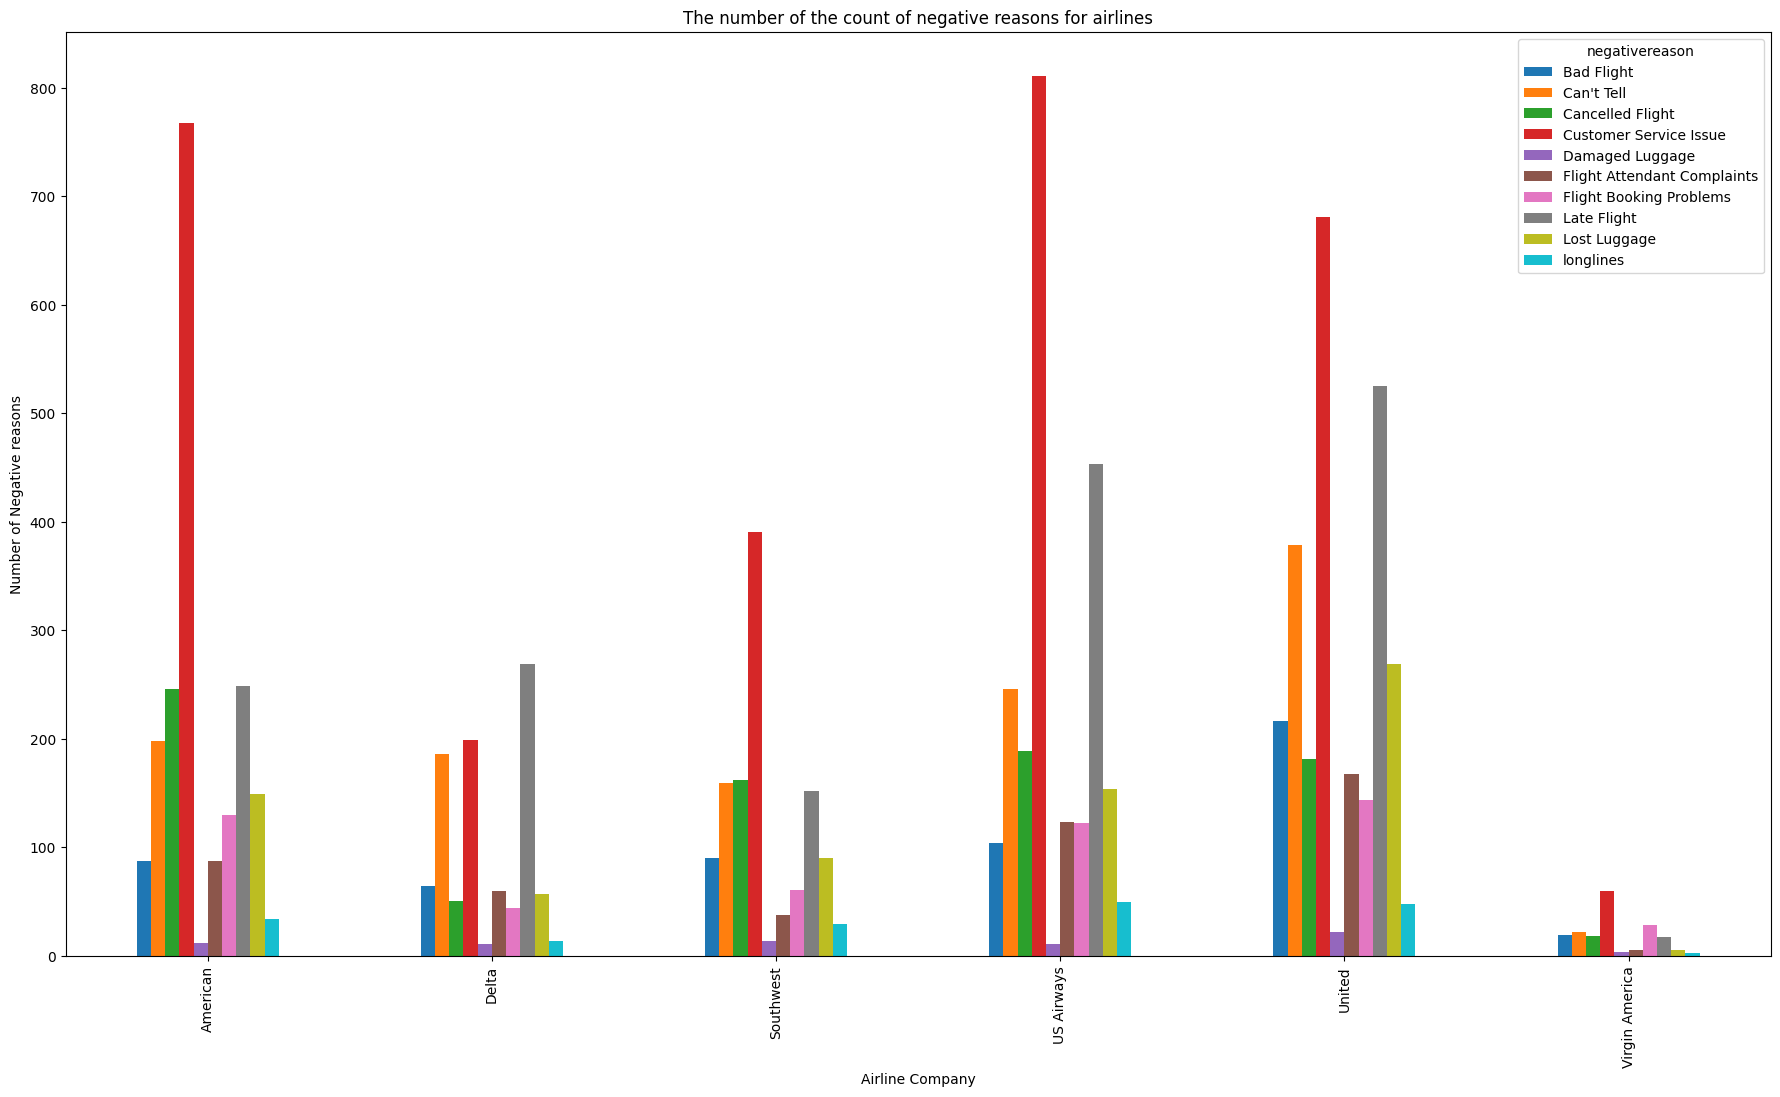

In [19]:
negative_reasons = data.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

In [21]:
import pandas as pd
import plotly.express as px
import os

# Assuming 'data' is your DataFrame loaded from 'Tweets.csv'
negative_reasons = data.groupby(['airline', 'negativereason']).size().unstack()

# Creating a folder to save the plots
folder_path_negative_reasons = 'airline_negative_reasons_plots'
os.makedirs(folder_path_negative_reasons, exist_ok=True)

# Generating and saving plots for each airline
for airline in negative_reasons.index:
    # Extracting data for the specific airline
    airline_data = negative_reasons.loc[airline]

    # Creating the Plotly bar plot using a unique color for each negative reason
    fig = px.bar(airline_data, color=airline_data.index,
                 labels={'value': 'Count of Negative Reasons', 'index': 'Negative Reason'},
                 title=f'Count of Negative Reasons for {airline}',
                 color_discrete_sequence=px.colors.qualitative.D3)  # Using D3 color palette

    # Adding axis labels
    fig.update_xaxes(title_text='Negative Reason')
    fig.update_yaxes(title_text='Count of Negative Reasons')

    # Save the plot as an image
    file_name = f'{airline}_negative_reasons.png'
    file_path = os.path.join(folder_path_negative_reasons, file_name)
    fig.write_image(file_path)


#### Negative emotion for Each of the Airlines

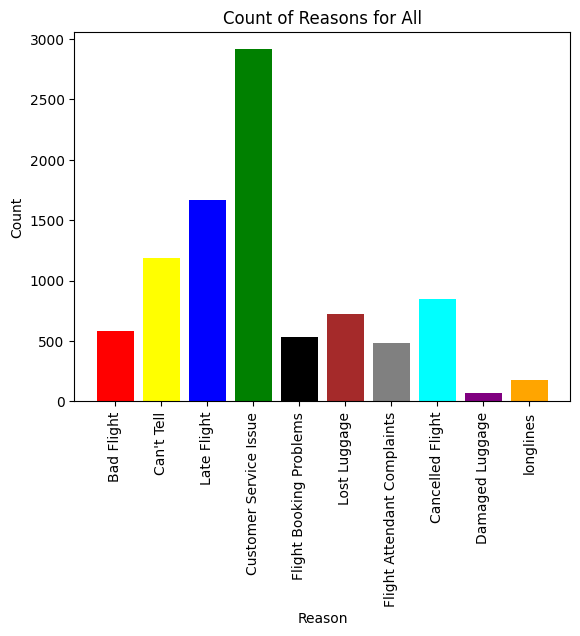

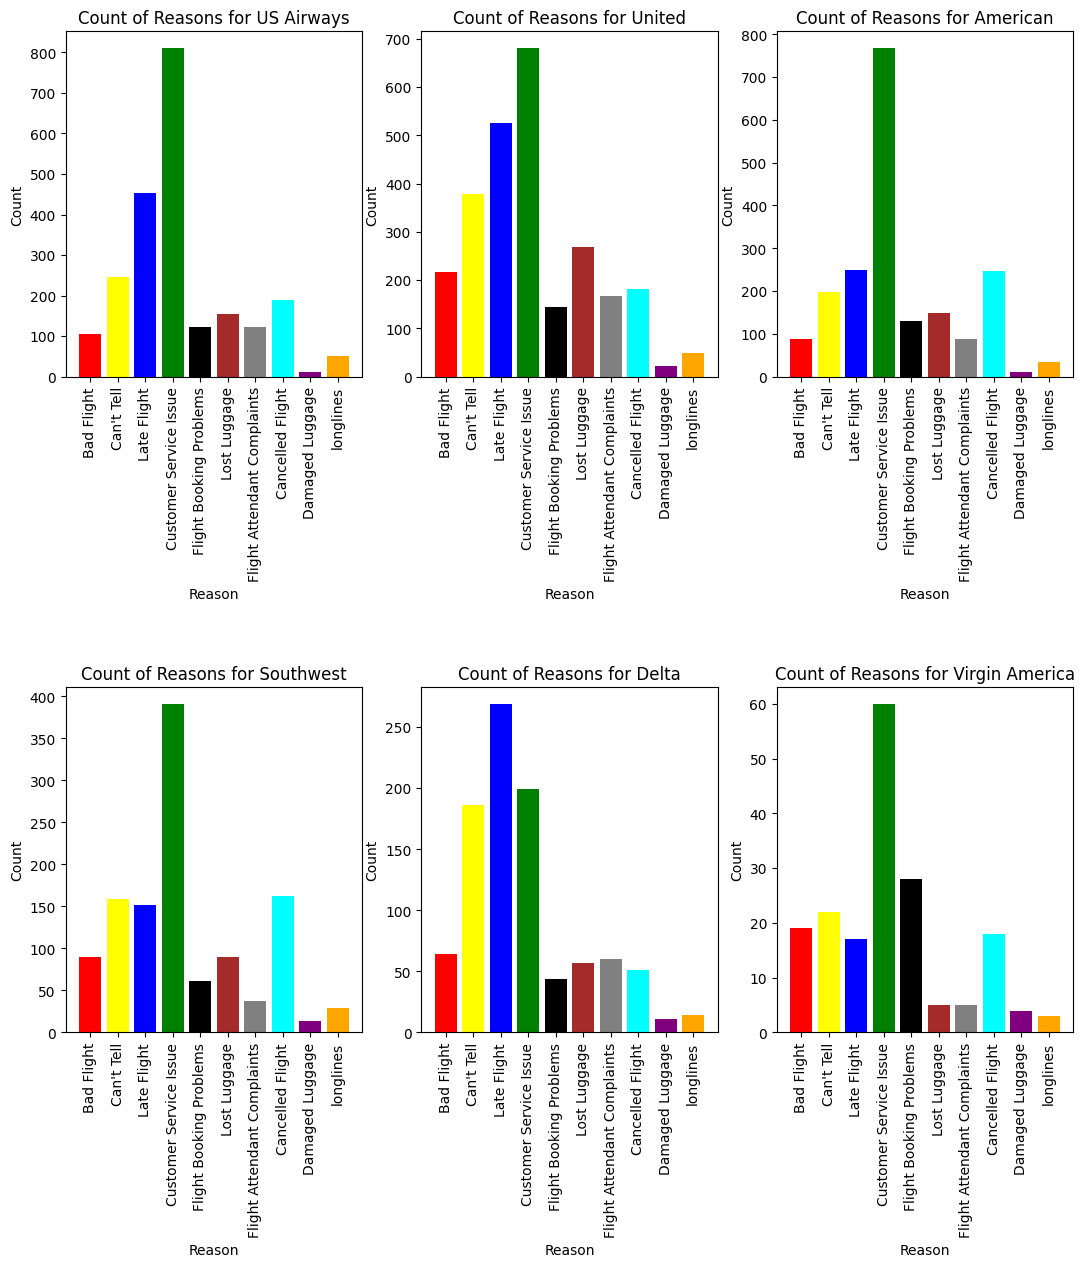

In [20]:
#get the number of negative reasons
data['negativereason'].nunique()

NR_Count=dict(data['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=data
    else:
        a=data[data['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(data['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

#### Word Cloud for Negative sentiment

In [22]:
!pip install wordcloud matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [24]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Assuming 'data' is your DataFrame loaded from 'Tweets.csv'
# Filter for negative sentiments
negative_tweets = data[data['airline_sentiment'] == 'negative']

# List of airlines
airlines = negative_tweets['airline'].unique()

# Create a folder to save the word clouds
folder_path = 'airline_wordclouds'
os.makedirs(folder_path, exist_ok=True)

# Generating and saving word clouds for each airline
for airline in airlines:
    # Extracting text for the specific airline
    airline_text = ' '.join(negative_tweets[negative_tweets['airline'] == airline]['text'])

    # Creating a word cloud
    wordcloud = WordCloud(width=800, height=800, 
                          background_color='white', 
                          min_font_size=10).generate(airline_text)

    # Creating a figure
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad=0) 
    plt.title(airline)

    # Save the word cloud as an image
    file_name = f'{airline}_negative_sentiment_wordcloud.png'
    file_path = os.path.join(folder_path, file_name)
    plt.savefig(file_path)

    plt.close()


#### Droping the rows with neutral sentiments

In [11]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

#### Label Encoding 

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


### Preprocessing the tweet text data

In [13]:
# cleaning the tweet text data to apply classification algorithms on it

import re

def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", tweet) 
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return " ".join(meaningful_words)


In [14]:
from nltk.corpus import stopwords

nltk.download('stopwords')
data['clean_tweet'] = data['text'].apply(lambda x: tweet_to_words(x))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/students/mgharpur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
### Vectorization
x = data.clean_tweet
y = data.airline_sentiment

print(len(x), len(y))


11541 11541


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.25)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

## Model Building

### 1. Logistic Regression

In [36]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, FloatType

# Start Spark session
spark = SparkSession.builder.appName('SentimentAnalysis').getOrCreate()

# Convert pandas dataframe to Spark dataframe
sdf = spark.createDataFrame(data)

# Define stages for the pipeline
tokenizer = Tokenizer(inputCol="clean_tweet", outputCol="words")
hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")
labelIndexer = StringIndexer(inputCol="airline_sentiment", outputCol="label")
lr = LogisticRegression(maxIter=10, regParam=0.01)

# Create the pipeline
pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, labelIndexer, lr])

# Split the data into train and test sets
(trainingData, testData) = sdf.randomSplit([0.8, 0.2], seed=1234)

# Train the model
model = pipeline.fit(trainingData)

# Make predictions on test data
predictions = model.transform(testData)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

def predict_sentiment(text):
    # Create a local DataFrame with the text
    local_df = spark.createDataFrame([(text,)], ["clean_tweet"])

    # Transform the local DataFrame using the model to make a prediction
    prediction = model.transform(local_df)

    # Extract the predicted label index and probability vector
    predicted_label_index = prediction.select("prediction").collect()[0]["prediction"]
    predicted_probability = prediction.select("probability").collect()[0]["probability"].toArray()

    # Extract the labels from the StringIndexerModel (which is the last but one stage in the pipeline)
    labels = model.stages[-2].labels

    # Map the predicted label index (float) to the corresponding string label
    predicted_label = labels[int(predicted_label_index)]

    # Calculate the confidence
    confidence = float(predicted_probability[int(predicted_label_index)])

    return predicted_label, confidence

# Test the prediction function
text_to_predict = "I had an okay flight with comfortable seats and average customer service"
predicted_sentiment, confidence = predict_sentiment(text_to_predict)
print(f"The predicted sentiment for the text '{text_to_predict}' is: {predicted_sentiment} with confidence {confidence:.2f}")

23/11/27 18:28:00 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:01 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:01 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:02 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:02 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:02 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:03 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:03 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:03 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:03 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:04 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/11/27 18:28:04 WARN DAGScheduler: Broadcasting larg

Test set accuracy = 0.9182444061962134


23/11/27 18:28:09 WARN StringIndexerModel: Input column airline_sentiment does not exist during transformation. Skip StringIndexerModel for this column.
23/11/27 18:28:10 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
23/11/27 18:28:10 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB


The predicted sentiment for the text 'I had an okay flight with comfortable seats and average customer service' is: negative with confidence 0.52


In [18]:
# from pyspark.sql import SparkSession
# from pyspark.ml.feature import Tokenizer, HashingTF, IDF, StringIndexer
# from pyspark.ml.classification import NaiveBayes
# from pyspark.ml import Pipeline
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# # Start Spark session
# spark = SparkSession.builder.appName('SentimentAnalysis').getOrCreate()

# # Convert pandas dataframe to Spark dataframe
# sdf = spark.createDataFrame(data)

# # Define stages for the pipeline
# tokenizer = Tokenizer(inputCol="clean_tweet", outputCol="words")
# hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures")
# idf = IDF(inputCol="rawFeatures", outputCol="features")
# labelIndexer = StringIndexer(inputCol="airline_sentiment", outputCol="label")

# # Use Naive Bayes Classifier
# nb = NaiveBayes(labelCol="label", featuresCol="features")

# pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, labelIndexer, nb])

# # Splitting, training, and predictions
# (trainingData, testData) = sdf.randomSplit([0.8, 0.2], seed=1234)
# model = pipeline.fit(trainingData)
# predictions = model.transform(testData)

# # Evaluate the model
# evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
# accuracy = evaluator.evaluate(predictions)
# print("Test set accuracy with Naive Bayes = " + str(accuracy))

# # Prediction function
# def predict_sentiment(text):
#     # Create a local DataFrame with the text
#     local_df = spark.createDataFrame([(text,)], ["clean_tweet"])

#     # Transform the local DataFrame using the model to make a prediction
#     prediction = model.transform(local_df)

#     # Extract the predicted label index and probability vector
#     predicted_label_index = prediction.select("prediction").collect()[0]["prediction"]
#     predicted_probability = prediction.select("probability").collect()[0]["probability"].toArray()

#     # Extract the labels from the StringIndexerModel
#     labels = model.stages[-2].labels

#     # Map the predicted label index to the corresponding string label
#     predicted_label = labels[int(predicted_label_index)]

#     # Calculate the confidence
#     confidence = float(predicted_probability[int(predicted_label_index)])

#     return predicted_label, confidence

# # Test the prediction function
# text_to_predict = "I had an okay flight with comfortable seats and average customer service"
# predicted_sentiment, confidence = predict_sentiment(text_to_predict)
# print(f"The predicted sentiment for the text '{text_to_predict}' is: {predicted_sentiment} with confidence {confidence:.2f}")


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/02 17:55:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/12/02 17:55:39 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/12/02 17:55:40 WARN DAGScheduler: Broadcasting large task binary with size 4.1 MiB
23/12/02 17:55:41 WARN DAGScheduler: Broadcasting large task binary with size 8.1 MiB
23/12/02 17:55:42 WARN StringIndexerModel: Input column airline_sentiment does not exist during transformation. Skip StringIndexerModel for this column.


Test set accuracy with Naive Bayes = 0.8657487091222031


23/12/02 17:55:42 WARN DAGScheduler: Broadcasting large task binary with size 8.0 MiB
23/12/02 17:55:43 WARN DAGScheduler: Broadcasting large task binary with size 8.1 MiB


The predicted sentiment for the text 'I had an okay flight with comfortable seats and average customer service' is: negative with confidence 1.00
